In [1]:
# Importing Libraries

import math
import matplotlib.pyplot as plt
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Imporitng the Data
data = pd.read_csv("TSLA.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,262.220001,263.000000,257.820007,259.149994,259.149994,2610900
1,2015-07-13,262.250000,262.549988,256.049988,262.160004,262.160004,2960300
2,2015-07-14,262.100006,265.989990,260.510010,265.649994,265.649994,1907600
3,2015-07-15,266.739990,267.489990,262.079987,263.140015,263.140015,2021600
4,2015-07-16,264.220001,267.200012,263.160004,266.679993,266.679993,1616000


In [4]:
# Splitting the dataset into Train set and Test set
train = data.iloc[:800,1:2].values
test = data.iloc[800:,1:2].values

In [5]:
# Feature Scaling
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)

### We will be taking privois 60 days of stocks prices to predict the stock price of each days

In [6]:
# Crearing the Data structure 

x_train = []
y_train = []

for i in range (60,len(train)):
    x_train.append(train_sc[i-60:i,0])
    y_train.append(train_sc[i,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [7]:
# Reshaping the data set
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

740

In [13]:
# Builiding the Model 
model = Sequential()

# Input Layer
model.add(LSTM(units= 50, return_sequences = True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Hidden Layers
model.add(LSTM(units= 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units= 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units= 50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))



In [15]:
# Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
# Training the model
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
740/740 [==============================] - 11s 15ms/step - loss: 0.0637 9s - 
Epoch 2/100
740/740 [==============================] - 4s 6ms/step - loss: 0.0195
Epoch 3/100
740/740 [==============================] - 5s 6ms/step - loss: 0.0130
Epoch 4/100
740/740 [==============================] - 5s 6ms/step - loss: 0.0119
Epoch 5/100
740/740 [==============================] - 6s 7ms/step - loss: 0.0121
Epoch 6/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0120
Epoch 7/100
740/740 [==============================] - 5s 6ms/step - loss: 0.0127
Epoch 8/100
740/740 [==============================] - 5s 6ms/step - loss: 0.0105
Epoch 9/100
740/740 [==============================] - 6s 7ms/step - loss: 0.0113
Epoch 10/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0106
Epoch 11/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0102
Epoch 12/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0099
Epoch

Epoch 99/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0030
Epoch 100/100
740/740 [==============================] - 5s 6ms/step - loss: 0.0029


In [25]:
# Preapring the Test Data set

train = data.iloc[:800,1:2]
test = data.iloc[800:,1:2]

data_set = pd.concat((train,test),axis=0)

inputs = data_set[len(data_set)-len(test)-60:].values


In [26]:
# Reshaping the test data for predict method

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [28]:
# Preparing the final data to be tested

x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [37]:
# Prediction

Predicted_sp = model.predict(x_test)
Predicted_sp = sc.inverse_transform(Predicted_sp)

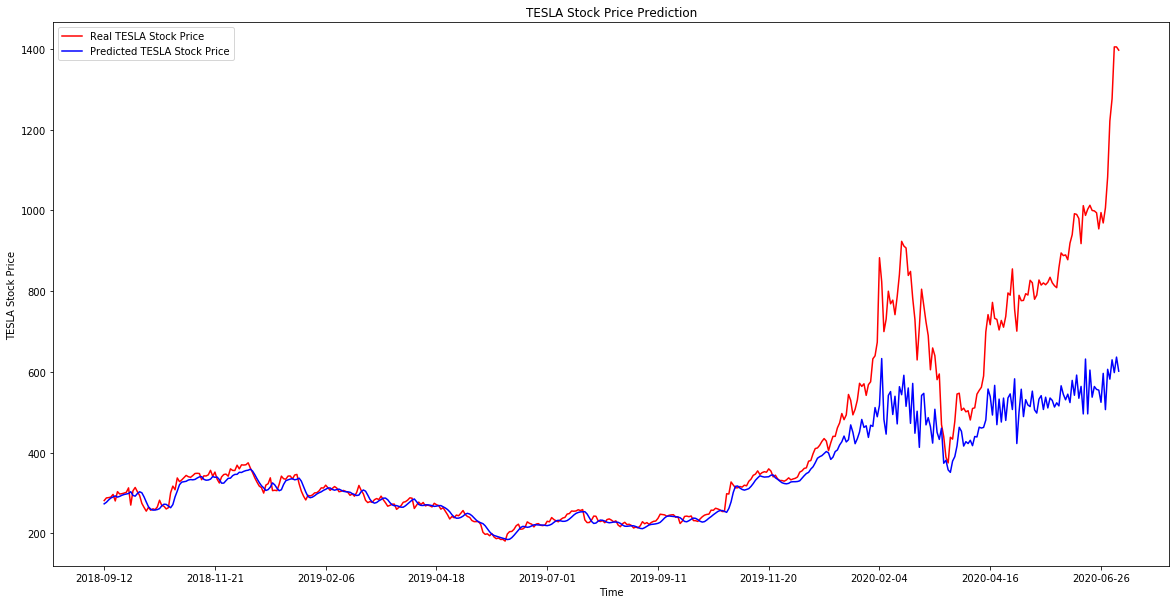

In [39]:
# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(data.loc[800:, 'Date'],test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(data.loc[800:, 'Date'],Predicted_sp, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()